In [23]:
import pandas as pd
from tqdm import tqdm
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import seaborn as sns
from scipy.spatial.distance import cosine
import numpy as np

## Task1

In [24]:
review_df = pd.read_json(r"/Users/edu/Documents/compsoc/code/yelp_academic_dataset_review_Nov2022_small.jsonl", lines=True)
review_df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
9995,ZcBtCA9jGhLfakf1jJ2BAg,yab1cq5yzrTHzoyz8LYqYQ,1-z7wd860Rii4kbEMCT8DA,5,0,0,0,Excellent food and service. The place is funct...,2018-06-26 17:41:31
9996,UIkEO-10J6Y99IhRqUflvg,lYAmgL_l7A3MPFYe1DYKrw,EpREWeEpmR8f1qLHzzF0AA,5,0,1,0,Just about to get tucked into a meatloaf that ...,2018-01-09 20:26:13
9997,S-NQM3Axcg8JS3MXHUIvyw,rE2WwfgJbYfvDwBlgq__dQ,dvidzWEPgTQPeBc8CUV2OQ,5,0,0,0,Outstanding customer service! And my car is dr...,2015-04-01 21:50:28
9998,ME79YrEhm2xe4IQy_0zkGw,OnIklvzKDpk1BduC84TrTA,2XYPFRm7teCUr3eGsB2-qw,5,0,0,0,I and my husband went here for Dinner one day ...,2015-06-08 19:32:26


In [26]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
all_scores = []
subjective_phrases_in_doc = []
for item in tqdm(review_df.iloc):
    text = item["text"]
    doc = nlp(text)
    polarity_score = 0
    for assess_tuple in doc._.blob.sentiment_assessments.assessments:
        subjective_phrases_in_doc.append(' '.join(assess_tuple[0]))
        polarity_score += assess_tuple[1]
    all_scores.append(polarity_score)
all_scores

10000it [02:34, 64.87it/s]


[1.0233333333333332,
 4.425000000000001,
 1.5392857142857146,
 2.4204545454545454,
 5.613571428571428,
 2.4333333333333336,
 4.925530303030302,
 3.0333333333333337,
 -0.28055555555555567,
 2.2363636363636363,
 5.97,
 0.6000000000000001,
 2.5,
 1.9199999999999997,
 5.5375,
 2.775,
 1.75,
 2.1785714285714284,
 3.576145833333334,
 5.219047619047619,
 1.7333333333333334,
 3.9683333333333333,
 0.5,
 3.0916666666666663,
 6.358333333333333,
 1.875,
 2.5,
 -0.625,
 5.166666666666666,
 0.7955555555555556,
 3.509895833333333,
 1.575,
 2.1666666666666665,
 1.2857142857142858,
 4.033333333333333,
 2.3857142857142857,
 0.41666666666666674,
 9.156190476190478,
 1.375,
 1.6600000000000001,
 1.7,
 -2.3,
 3.873015873015872,
 1.3,
 1.7166666666666666,
 3.6,
 -0.6522727272727274,
 0.7,
 3.2,
 5.35,
 -0.385714285714286,
 5.44,
 7.979444444444445,
 1.3666666666666667,
 1.0363636363636364,
 2.2273809523809525,
 2.4000000000000004,
 2.933333333333333,
 3.3166666666666664,
 2.8208333333333337,
 0.116666666666

In [5]:
review_df["polarity score"] = all_scores
review_df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,polarity score
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,1.023333
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,4.425000
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,1.539286
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,2.420455
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,5.613571
...,...,...,...,...,...,...,...,...,...,...
9995,ZcBtCA9jGhLfakf1jJ2BAg,yab1cq5yzrTHzoyz8LYqYQ,1-z7wd860Rii4kbEMCT8DA,5,0,0,0,Excellent food and service. The place is funct...,2018-06-26 17:41:31,1.800000
9996,UIkEO-10J6Y99IhRqUflvg,lYAmgL_l7A3MPFYe1DYKrw,EpREWeEpmR8f1qLHzzF0AA,5,0,1,0,Just about to get tucked into a meatloaf that ...,2018-01-09 20:26:13,0.600000
9997,S-NQM3Axcg8JS3MXHUIvyw,rE2WwfgJbYfvDwBlgq__dQ,dvidzWEPgTQPeBc8CUV2OQ,5,0,0,0,Outstanding customer service! And my car is dr...,2015-04-01 21:50:28,1.097727
9998,ME79YrEhm2xe4IQy_0zkGw,OnIklvzKDpk1BduC84TrTA,2XYPFRm7teCUr3eGsB2-qw,5,0,0,0,I and my husband went here for Dinner one day ...,2015-06-08 19:32:26,2.812500


<AxesSubplot:xlabel='stars', ylabel='polarity score'>

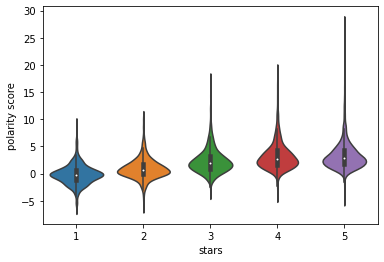

In [6]:
sns.violinplot(data=review_df, x="stars", y="polarity score")

As the stars of review increase, the document level polarity score increase. the relationship between average polarity score and stars from review seem to be linear. The maximum polarity score did increase as the stars from review increase. (10 for 1 star and around 30 for 5 star) however the minimum polarity score for each stars have not exceed the -10. It is likely that people with longer reviews from more stars have more subjective words which lead to a bigger polarity score.

## Task2

In [7]:
all_subject = []
for item in tqdm(review_df.iloc):
    text = item["text"]
    doc = nlp(text)
    subjective_phrases_in_doc = ""
    for assess_tuple in doc._.blob.sentiment_assessments.assessments:
        subjective_phrases_in_doc += assess_tuple[0][0] + " "
    all_subject.append(subjective_phrases_in_doc)

10000it [02:27, 67.59it/s]


In [8]:
def get_subjective_vector(text):
    doc = nlp(text)
    subjective_phrases_in_doc = ""
    for assess_tuple in doc._.blob.sentiment_assessments.assessments:
        subjective_phrases_in_doc += assess_tuple[0][0] + " "
    return nlp(subjective_phrases_in_doc).vector

In [9]:
target_review_ids = ["40thYphUgIfvJq17QCfTwA", "E9AB7V4z8xrt2uPF7T55FQ", "4PHFo_GRG4FEk1q4X7xQVQ", "4KpIldEM-tdnrJLqYzRfZQ", "PDHRlnEdkEcwATry4w71PQ", "meGaFP7yxQdjyABrYDVeoQ", "pgESDcC7eDx4z_epqon4_Q", "qeSxL-POvGLZD6aQ5O9kvw"]

In [10]:
comments = []
for review_id in target_review_ids:
    review_str = list(review_df[review_df["review_id"] == review_id]["text"])[0]
    comments.append(review_str)

In [11]:
similar_for_8 = []
c = 0
for com in comments:
    print("comments:", str(c + 1))
    this_similar = []
    this_vec = nlp(comments[c]).vector
    for item in tqdm(review_df.iloc):
        if item["review_id"] in target_review_ids:
            continue
        text = item["text"]
        vec = get_subjective_vector(text)
        try:
            this_similar.append(cosine(this_vec, vec))
        except:
            this_similar.append(0)
    similar_for_8.append(this_similar)
    c += 1

comments: 1


10000it [03:13, 51.58it/s]


comments: 2


10000it [03:14, 51.40it/s]


comments: 3


10000it [03:15, 51.20it/s]


comments: 4


10000it [03:13, 51.77it/s]


comments: 5


10000it [03:13, 51.69it/s]


comments: 6


10000it [03:11, 52.18it/s]


comments: 7


10000it [03:13, 51.62it/s]


comments: 8


10000it [03:29, 47.62it/s]


In [12]:
top3_index = []
for scores in similar_for_8:
    top3_index.append(np.array(scores).argsort()[-3:][::-1])

In [13]:
top3_index ##0 indicate the frist review-id("40thYphUgIfvJq17QCfTwA"),
            1 indicate the second one("E9AB7V4z8xrt2uPF7T55FQ"), ...... 7 indicate the last review-id.

[array([  22,  271, 5639]),
 array([6381,  437, 4179]),
 array([2748, 9155, 8949]),
 array([3891, 5639, 8280]),
 array([5886, 1549, 9155]),
 array([1723, 1072, 5347]),
 array([5902, 5919, 6487]),
 array([9155, 1549, 7660])]

In [14]:
review_df.iloc[top3_index[0]] 

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,polarity score
22,J-4NdnDZ0pUQaUEEwDI9KQ,vrKkXsozqqecF3CW4cGaVQ,rjuWz_AD3WfXJc03AhIO_w,5,2,2,2,I thoroughly enjoyed the show. Chill way to s...,2012-12-04 16:46:20,0.5000
271,B_O-c_YGiNRXFk3yGzYhyQ,LNHVcCbz5L5IfzR6aI67Dw,dxNmbVCP-HGrDkPi4lqKDw,1,0,0,0,Called in to get service information on my 201...,2014-12-18 19:55:37,0.1000
5639,_ny2n39iUtf8TFRC560VPQ,ErYq_k9YfcpmOLd7JqHM9A,eRtrcUyflgHRyrP1-yPMsg,5,1,0,0,"I have total confidence in Amy Sclarsky, and D...",2011-02-13 20:49:12,0.8125


In [15]:
review_df.iloc[top3_index[1]]

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,polarity score
6381,A8Udkib9MwDZrPadL6oYlQ,9LQTL4Ueu1PslRjsgRdf-g,fGeJIvuGAQE5sbVIbwQYXg,5,0,0,0,Outstanding! Most of their stuff is 110 calori...,2011-11-30 04:10:29,1.725
437,b22OR-MNCZ-TOf6XIbkg6w,nGO8Re5IpOosHdWPqn8vWQ,Uc6PdjT_MO5bRPQsUUEy5Q,4,0,0,0,"We loved the food, service and decor! The minu...",2012-10-08 22:39:38,6.585
4179,1XyD-_wg7p-RaU7-Qh_G9A,NTx1uyMyXU5qh0345e962A,I1h0GRYp86eX-XqwVXsSGA,5,0,0,0,Food is excellent and fresh everytime I go the...,2015-11-06 02:47:11,2.550


In [16]:
review_df.iloc[top3_index[2]]

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,polarity score
2748,yRUZ_sIxV6FyNygZD6MNTg,0Dv4Vdvc9KzEg76j2OcwJQ,N1ZXhAVzOzbyCBPEXTaUUw,2,0,0,0,When I used to live in Philly and did not have...,2010-11-22 18:46:46,1.811364
9155,Xr9SBprIfe1er-K7tDjsCg,t7iuduWUtaa9OFa8tt8saA,t6gAgrvNQDHHvyhBXUDFrQ,5,0,0,0,Very much enjoyed this meal. The restaurant is...,2018-05-19 03:21:35,9.122500
8949,zFzBJ_nEPISE9GAC6Dr0QQ,DJlE6cCrRQ7iICEmokxfFQ,54XgUhaR0kDqw8bgbAEAtg,5,0,0,0,This is actually by far one of my favorite res...,2018-02-24 14:49:50,1.200000


In [17]:
review_df.iloc[top3_index[3]]

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,polarity score
3891,cQp8iKUJUsUp4VshPY05gg,bSRQp1PBDzCKyvepEQSYxQ,vN6v8m4DO45Z4pp8yxxF_w,4,0,0,0,This is our go-to breakfast spot when we're ba...,2012-01-03 20:33:33,2.111364
5639,_ny2n39iUtf8TFRC560VPQ,ErYq_k9YfcpmOLd7JqHM9A,eRtrcUyflgHRyrP1-yPMsg,5,1,0,0,"I have total confidence in Amy Sclarsky, and D...",2011-02-13 20:49:12,0.812500
8280,5OqpOvwk42yryOj3HaGgCQ,xttYXDJT9JokoiSTpirmjQ,eHQ0utxOdNVHVfDD7fYvdg,4,1,2,0,"Gray Brothers has been in Mooresville for 10,0...",2018-04-04 13:35:58,-2.340278


In [18]:
review_df.iloc[top3_index[4]]

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,polarity score
5886,DpOW1wai2xbdO7l2DWsidw,rvN_7x0-E_N-8H0nWc4irA,jmxV7k2IRlmMuDEl4ltwrA,5,0,0,0,Normally not into daiquiris but on a particula...,2015-08-19 20:10:45,2.709578
1549,c_bDLqXagJ-2mUab1mcOiQ,dCehRsK_TxjZ3hHfwkVG2A,KgozvZ1UFfXuJToqe8CfQg,1,0,1,0,I ate here for the first time today. The woma...,2010-01-08 17:30:19,1.144048
9155,Xr9SBprIfe1er-K7tDjsCg,t7iuduWUtaa9OFa8tt8saA,t6gAgrvNQDHHvyhBXUDFrQ,5,0,0,0,Very much enjoyed this meal. The restaurant is...,2018-05-19 03:21:35,9.122500


In [19]:
review_df.iloc[top3_index[5]]

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,polarity score
1723,BDGolw2FoOD78Kcg8tl1PQ,eL-d16Ky9-nFuAQ3SUBQZg,qjGS_7iaQDpbVhS6W8qkHQ,5,0,0,0,Banana pudding is amazing. You can get the ext...,2018-06-26 18:28:36,1.935714
1072,YUrsQ-YfGhCt9cidSqMXJw,xsEf_8uNdQKyKDtcU48cqw,W8Z4rXYkmZlEVSaxIVjyvg,2,2,0,0,My husband son and I went in for dinner last F...,2017-06-28 02:09:09,1.886905
5347,WNUMiymm2_ruYwvDwPddmg,G3UtIVC0Sl8cbiA0_cPyMg,W4ZEKkva9HpAdZG88juwyQ,5,0,0,0,"Wow, the BBQ Shrimp was killer. Definitely a ...",2015-09-23 23:53:37,2.733333


In [20]:
review_df.iloc[top3_index[6]]

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,polarity score
5902,Jg5We7zEV5N1ZlInmLL4fw,5Me93QYZKCP7mp51kxnOmA,Ax5taPtXMnxhUJjFUQHF4A,1,0,0,0,This was possibly the worst experience I've ev...,2015-02-16 19:31:47,-0.377013
5919,tQ3-BJJIHV-2cQ3O5GFY3g,O8jpYFb6QKVNwYvAFzdDqA,sLgnx_WFCjEoPsS6NwU70Q,5,1,0,0,Visited at breakfast time and liked having the...,2014-06-11 16:36:18,1.062500
6487,z4MWUAH5jv1bAIhj7zzPDg,P_BFaQP0rlHpEq9-CZbyCQ,O286wXm4mcznQn_1JieD1g,3,4,3,4,"Oh Whole Foods, how I loathe you, yet somehow ...",2009-03-03 20:58:55,0.983333


In [21]:
review_df.iloc[top3_index[7]]

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,polarity score
9155,Xr9SBprIfe1er-K7tDjsCg,t7iuduWUtaa9OFa8tt8saA,t6gAgrvNQDHHvyhBXUDFrQ,5,0,0,0,Very much enjoyed this meal. The restaurant is...,2018-05-19 03:21:35,9.122500
1549,c_bDLqXagJ-2mUab1mcOiQ,dCehRsK_TxjZ3hHfwkVG2A,KgozvZ1UFfXuJToqe8CfQg,1,0,1,0,I ate here for the first time today. The woma...,2010-01-08 17:30:19,1.144048
7660,NVQ25VVZ0N3XTA1vzr4yfg,d53XPbuax-aS7MuH29zIGQ,KC4Eo1S3AMA2qk8ULiLEkg,5,0,0,0,It is not too many arenas and stadiums across ...,2017-01-15 17:32:33,5.413745
